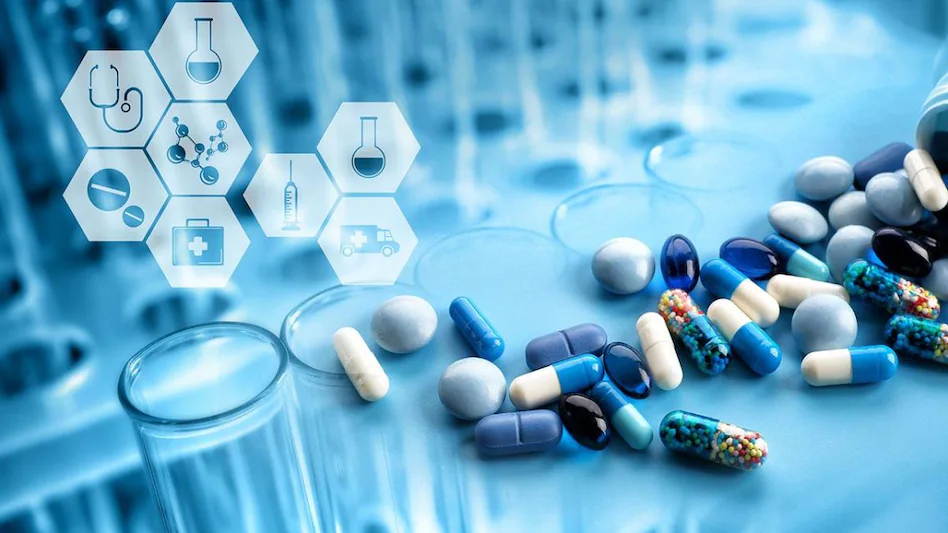

# **Table of Contents**

>[Executive Summary](#scrollTo=VrYM7dhtAnHw)

>[Business Definition](#scrollTo=cpGl18IqBEVM)

>[Data Exploration](#scrollTo=xnt-wS60BwtH)

>[Analysis](#scrollTo=h-vsIgQhDeLg)

>[Appendix](#scrollTo=_AODM3tRD4Fe)



# **1. Executive Summary**

type here...


# **2. Business Definition**

 2.1 Description


 2.2 Importance

# **3. Data Exploration**


# 3.1 Data Overview

In [ ]:
# grant the access to the google drive where data sources are located
from google.colab import drive
drive.mount('/content/drive')
PATH_TO_PROJECT = '/content/drive/Othercomputers/My MacBook Pro/GitHub/FAERS-analytics'
%cd $PATH_TO_PROJECT
!ls

# creat loops to read the names of files
import os

output_path_dir = 'data-out/'
input_path_dir = 'data/'

if not os.path.isdir(output_path_dir):
  !mkdir $output_path_dir

for file in os.listdir(input_path_dir):
  if file.endswith(".zip"):
    input_path_file = input_path_dir + file
    output_path_file = output_path_dir + file.split('.zip')[0]
    if not os.path.isdir(output_path_file):
      !mkdir $output_path_file
      !unzip $input_path_file -d $output_path_file

!ls $output_path_dir
q3_dir = output_path_dir + 'FAERS_ASCII_2023_Q3/ASCII/'
!ls $q3_dir
q4_dir = output_path_dir + 'FAERS_ASCII_2023_Q4/ASCII/'
!ls $q4_dir

In [ ]:
# import the data from the drive
import pandas as pd

data = {}
directories = [q3_dir, q4_dir]


for directory in directories:
  for file in os.listdir(directory):
    if file.endswith(".txt"):
      input_path_file = './' + directory + file
      output_data_frame_name = file.split('.txt')[0]
      output_data_frame = pd.read_csv(input_path_file, sep='$')
      data[output_data_frame_name] = output_data_frame

data.keys()

# Get the overview of data resources
for df_name, df in data.items():
    print('Current Table Name: ' + df_name)
    print('Current Table Shape: ' + str(df.shape))
    print('Current Table Snippet: \n')
    print(df.head())
    print ('\n\n -------------------------------------------------------------------------- \n\n')

# 3.2 Data Dictionary


**Demographic**

***PRIMARYID:***
Unique number for identifying a FAERS report. This is the
primary link field (primary key) between data files (example:
31234561). This is a concatenated key of Case ID and Case
Version Number.

***CASEID:***
Number for identifying a FAERS case.

***CASEVERSION:***
Safety Report Version Number. The Initial Case will be
version 1; follow-ups to the case will have sequentially
incremented version numbers.

***AGE_GRP:***
Patient Age Group code as follows, when available:
N Neonate
I Infant
C Child
T Adolescent
A Adult
E Elderly

**Drug**
type here...

**Reaction**

***PT:***
"Preferred Term"-level medical terminology describing the
event, using the Medical Dictionary for Regulatory Activities
(MedDRA).

# 3.3 Data Manipulation





In [ ]:
# 1. patient demographic and administrative information
demo23Q3=data['DEMO23Q3']
demo23Q4=data['DEMO23Q4']
demo_append = demo23Q3.append(demo23Q4, ignore_index=True).drop_duplicates()

# 2. all "Medical Dictionary for Regulatory Activities" (MedDRA) terms coded for the adverse event
reac23Q3=data['REAC23Q3']
reac23Q4=data['REAC23Q4']
reac_append = reac23Q3.append(reac23Q4, ignore_index=True).drop_duplicates()

# 3. report sources for the event
rpsr23Q3=data['RPSR23Q3']
rpsr23Q4=data['RPSR23Q4']
rpsr_append = rpsr23Q3.append(rpsr23Q4, ignore_index=True).drop_duplicates()

# 4. drug/biologic information for as many medications as were reported for the event
drug23Q3=data['DRUG23Q3']
drug23Q4=data['DRUG23Q4']
drug_append = drug23Q3.append(drug23Q4, ignore_index=True).drop_duplicates()

# 5. contains all "Medical Dictionary for Regulatory Activities" (MedDRA) terms coded for the indications for use (diagnoses) for the reported drugs
indi23Q3=data['INDI23Q3']
indi23Q4=data['INDI23Q4']
indi_append = indi23Q3.append(indi23Q4, ignore_index=True).drop_duplicates()

# 6. contains patient outcomes for the event
outc23Q3=data['OUTC23Q3']
outc23Q4=data['OUTC23Q4']
outc_append = outc23Q3.append(outc23Q4, ignore_index=True).drop_duplicates()

# 7. drug therapy start dates and end dates for the reported drugs
ther23Q3=data['THER23Q3']
ther23Q4=data['THER23Q4']
ther_append = ther23Q3.append(ther23Q4, ignore_index=True).drop_duplicates()

# **4. Data Analysis**

# 4.1 Adverse Reaction Frequecies Analysis

In this analysis, we are working on summarizing the frequencies of initial FAERS cases by specific medical event, namely reactions, from both 2023Q3 and 2023Q4 data, and figure out what reactions are the most popular ones. To futhur drill down into the data, we want to figure out in each medical event, who are the age groups that are reported the most.

In [15]:
# join the demo table with the reaction table in this case with looking at the initial case only
joined_df1 = demo_append[demo_append['i_f_code']=='I'].merge(reac_append , how='inner', on='primaryid')
# Grouping by 'key_column' and summing 'value1' and 'value2'
grouped_df = joined_df1.groupby(['pt', 'age_grp', 'sex']).size().reset_index(name='counts')
sorted_group_sizes1 = grouped_df.sort_values(by='counts', ascending=False).reset_index()

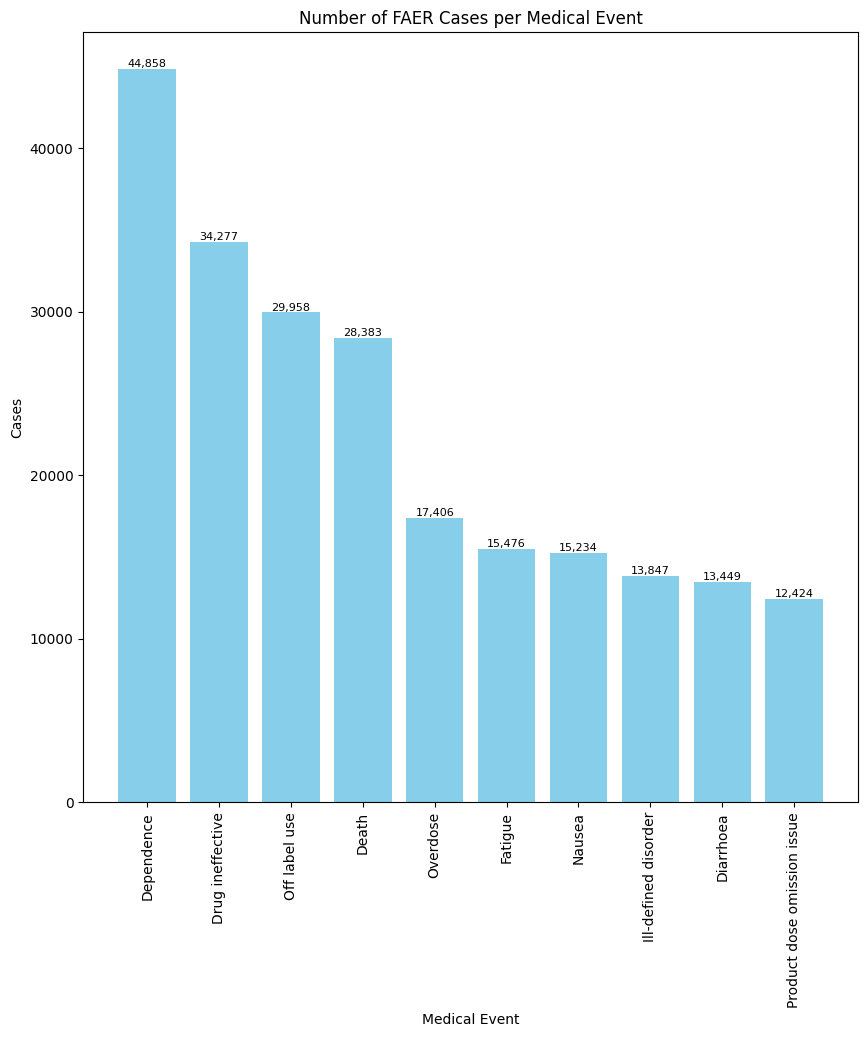

In [61]:
# import the plot lab for plotting
import matplotlib.pyplot as plt
grouped_df_one = joined_df1.groupby(['pt']).size().reset_index(name='counts')
sorted_group_sizes_one_group = grouped_df_one.sort_values(by='counts', ascending=False).reset_index()

plot_data = sorted_group_sizes_one_group.head(10)
plt.figure(figsize=(10, 10))  # Adjust the figure size as necessary
bars = plt.bar(plot_data['pt'], plot_data['counts'], color='skyblue')

# Adding annotations
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height()):,}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Medical Event')
plt.ylabel('Cases')
plt.title('Number of FAERS Cases per Medical Event')
plt.xticks(rotation=90)  # Rotate labels to make them readable if necessary
plt.show()

In [ ]:
# drill down the case numbers per medical event by age group
import numpy as np

select_pt = plot_data.pt.unique()
plot_data_three_group = sorted_group_sizes1[sorted_group_sizes1['pt'].isin(select_pt)]

def age_mapping(age):
    if age == 'A':
     return 'Adult'
    elif age == 'C':
     return 'Child'
    elif age == 'T':
     return 'Adolescent'
    elif age == 'I':
     return 'Infant'
    elif age == 'E':
     return 'Elderly'
    elif age == 'N':
     return 'Neonate'

plot_data_three_group['age']= plot_data_three_group['age_grp'].map(age_mapping)
#print(plot_data_three_group)

In [59]:
pivot_df_raw = plot_data_three_group.pivot_table(index='pt', columns=['age'], values='counts', aggfunc='sum')
pivot_df_raw['row_total']=pivot_df_raw['Adolescent']+pivot_df_raw['Adult']+pivot_df_raw['Child']+pivot_df_raw['Elderly']+pivot_df_raw['Infant']+pivot_df_raw['Neonate']
pivot_df = pivot_df_raw.sort_values(by='row_total',ascending = False)
#print(pivot_df)
sorted_pivot_df = pivot_df.iloc[:,:6]
#print(sorted_pivot_df)

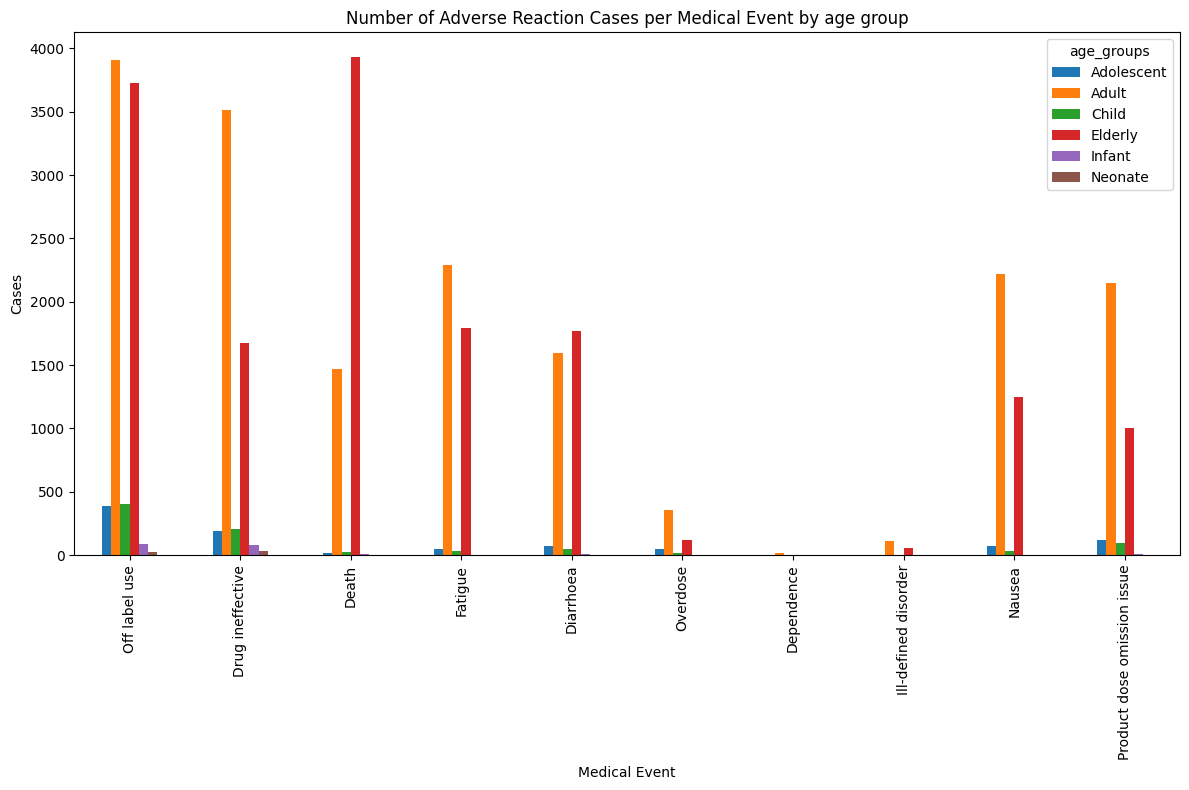

In [60]:
# Plotting
sorted_pivot_df.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Medical Event')
plt.ylabel('Cases')
plt.title('Number of FAERS Cases per Medical Event by age group')
plt.xticks(rotation=90)
plt.legend(title='age_groups')
plt.tight_layout()
plt.show()

**Summary:**


1.   According to the data of 2023Q3 and 2023Q4, the top 5 reactions after a FARES case was reported are dependence, drug ineffective, off-label use, death and overdose.
2.   To futhur break down the reactions by age, we can clear observe that the adults and the elderlys are mostly reported in the reactions after a FARES case was reported.



# 4.2


In [ ]:
##Mayank

# 4.3


In [ ]:
##Kumar

# 4.4



In [ ]:
##Rishabh

# 4.5



In [ ]:
##Rishabh

# 5. Appendix